# P-166- Apple Stock Forecast (Forecasting Model)
### 1) Import Libraries

In [1]:
# pip freeze   ## To Check Versions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
import statsmodels.api as sm
import warnings              # Supressing warnings
warnings.filterwarnings('ignore')

### 2) Import Dataset

In [3]:
df = pd.read_csv(r"C:\Users\hp\Downloads\AAPL.csv") 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


+ We have imported the Dataset for Forecasting Model - Apple Stock using Pandas. 
+ This Data Set contains 2011 Rows and 7 Columns
+ Date Range - From 01/03/2012 To 12/30/2019. We Have total 7 year data.

### 3) EDA: Data Pre-Processing
+ EDA is applied to investigate the data and summarize the key insights. It will give you the basic understanding of your data, it's distribution, null values and much more. You can either explore data using graphs or through some python functions. There will be two type of analysis. Univariate and Bivariate.

In [4]:
df=df.round(decimals=2, out=None)

+ Stock price in this Data Set has got 6 decimal values. We have tried rounded the decimal values to two - digits for the purpose of projection.

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.49,58.93,58.43,58.75,50.77,75555200
1,2012-01-04,58.57,59.24,58.47,59.06,51.04,65005500
2,2012-01-05,59.28,59.79,58.95,59.72,51.61,67817400
3,2012-01-06,59.97,60.39,59.89,60.34,52.14,79573200
4,2012-01-09,60.79,61.11,60.19,60.25,52.06,98506100


+ We have extracted the first five rows of the dataset and it is useful for quickly testing if the object has the right type of data in it.

In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2019-12-23,280.53,284.25,280.37,284.00,282.05,24643000
2007,2019-12-24,284.69,284.89,282.92,284.27,282.32,12119700
2008,2019-12-26,284.82,289.98,284.70,289.91,287.92,23280300
2009,2019-12-27,291.12,293.97,288.12,289.80,287.81,36566500
2010,2019-12-30,289.46,292.69,285.22,291.52,289.52,36028600


+ We have extracted the last five rows of the dataset.

In [7]:
df.shape

(2011, 7)

+ This DataSet comprises of 2011 observations and 10 characteristics.

In [8]:
df.index

RangeIndex(start=0, stop=2011, step=1)

+ The index information contains the labels of the rows. Index property returns a Range Index object with the start, stop, and step values.

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

+ Names of Columns in data are shown here. 

In [10]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

+ Data has float and integer values.
+ Date Column is in Object type, so first we convert it into datetime format.

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2011 non-null   datetime64[ns]
 1   Open       2011 non-null   float64       
 2   High       2011 non-null   float64       
 3   Low        2011 non-null   float64       
 4   Close      2011 non-null   float64       
 5   Adj Close  2011 non-null   float64       
 6   Volume     2011 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.1 KB


+ Shows no. of rows, columns, Data types of each column and also null values

In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.00000,2.011000e+03
mean,126.707509,127.827618,125.580308,126.741273,119.50548,5.949670e+07
std,50.483719,50.926281,50.124898,50.578336,52.43837,4.683856e+07
min,55.420000,57.090000,55.010000,55.790000,48.92000,1.136200e+07
25%,85.880000,86.720000,85.060000,86.200000,75.05500,2.758565e+07
50%,113.050000,114.190000,111.870000,113.050000,105.22000,4.346900e+07
75%,165.190000,167.410000,163.425000,165.245000,160.05000,7.471030e+07
max,291.120000,293.970000,288.120000,291.520000,289.52000,3.765300e+08


+ Descriptive Statistics
+ Here as we can notice median value is less than mean value of each column. Median value is represented by 50%(50th percentile) in index column.

In [15]:
df.isna().sum()  

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

+ No null values in given data set that is data is completely filled.

In [16]:
df[df.duplicated()]   

,Date,Open,High,Low,Close,Adj Close,Volume


+ No duplicate values exist in given dataset

In [17]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557957
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559653
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566333
Volume,-0.557957,-0.554909,-0.563426,-0.559653,-0.566333,1.000000


+ Shows relationship between variables

### 4) Visualization of Data
### Heatmap ( Correlation Matrix) :

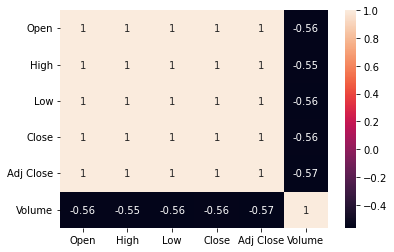

In [18]:
sns.heatmap(df.corr(), annot=True)
plt.show()

+ from this heatmap we can say there is a strong correlation between five columns that is open, high, low, close, adjacent close so we can choose any one from this for prediction. we choose close column to predict stock price.

### Boxplot (or Box-and-Whisker plot):

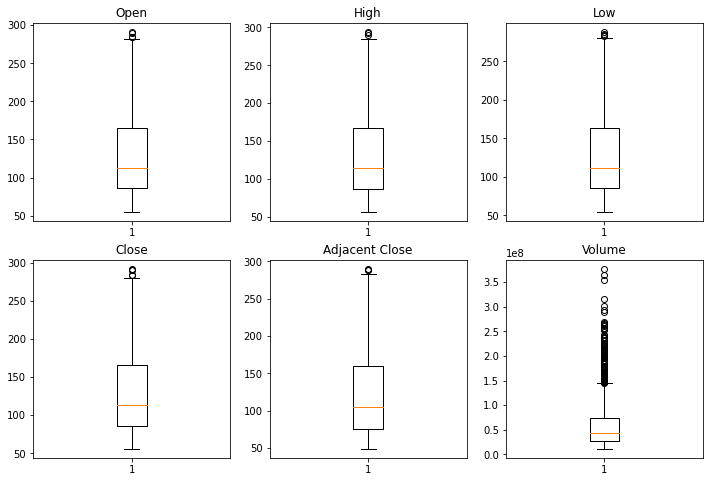

In [19]:
fig, ax = plt.subplots(2,3, figsize = (12,8))
ax[0,0].boxplot(df.Open);ax[0,0].set_title("Open")
ax[0,1].boxplot(df.High);ax[0,1].set_title("High")
ax[0,2].boxplot(df.Low);ax[0,2].set_title("Low")
ax[1,0].boxplot(df.Close);ax[1,0].set_title("Close")
ax[1,1].boxplot(df["Adj Close"]);ax[1,1].set_title("Adjacent Close")
ax[1,2].boxplot(df.Volume);ax[1,2].set_title("Volume")
plt.show()

+ As we Observe that there are minimum number of Outliers in every columns so we can neglect those outlier.
+ There are High no. of Outliers in 'Volume' column

In [20]:
df.set_index('Date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.strftime('%B')
df['day'] = df.index.strftime('%A')
df['quarter'] = df.index.quarter

### Yearwise Data distribution

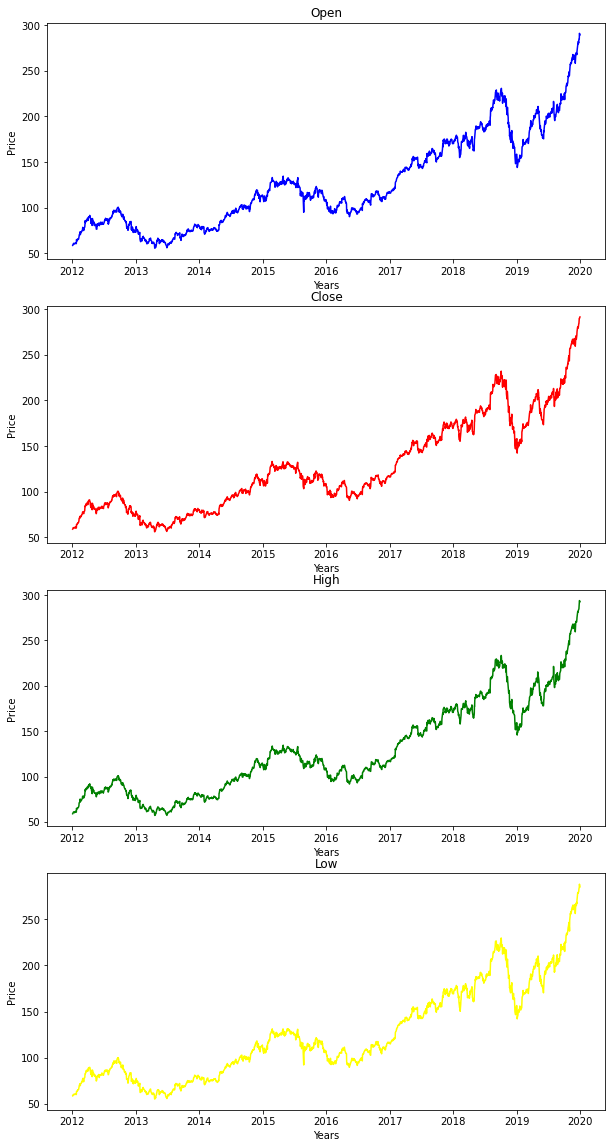

In [21]:
plt.figure(figsize=(10,20))
plt.subplot(4,1,1)
plt.plot(df.index, df['Open'], color = 'blue');plt.title("Open");plt.xlabel("Years"); plt.ylabel('Price')
plt.subplot(4,1,2)
plt.plot(df.index, df['Close'], color = 'red');plt.title("Close");plt.xlabel("Years"); plt.ylabel('Price')
plt.subplot(4,1,3)
plt.plot(df.index, df['High'], color = 'green');plt.title("High");plt.xlabel("Years"); plt.ylabel('Price')
plt.subplot(4,1,4)
plt.plot(df.index, df['Low'], color = 'yellow');plt.title("Low");plt.xlabel("Years"); plt.ylabel('Price')
plt.show()

In [22]:
close_year = df.groupby("year")[["Close"]].sum()
close_year.head()

,Close
year,
2012,20573.26
2013,17014.84
2014,23250.73
2015,30250.08
2016,26360.21


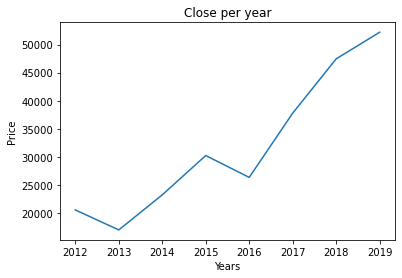

In [23]:
plt.plot(close_year);plt.xlabel("Years");plt.ylabel('Price');plt.title("Close per year")
plt.show()

+ From above graph we conclude there is a sudden drop in 2013 and 2016 years.
+ Overall trend is upward

In [24]:
close_month = df.groupby("month")[["Close"]].sum()
close_month.head()

,Close
month,
April,20080.78
August,23633.79
December,22603.49
February,17377.55
January,17696.30


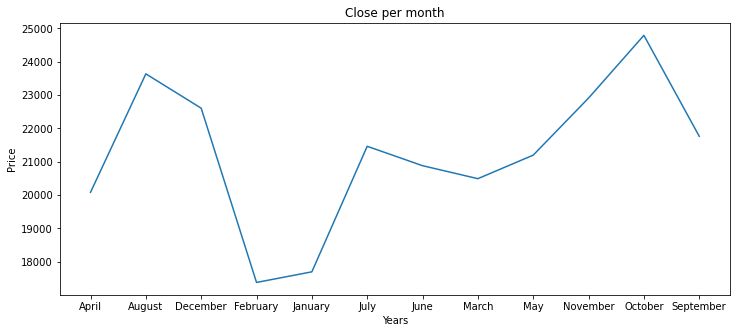

In [25]:
plt.figure(figsize=(12,5))
plt.plot(close_month);plt.xlabel("Years");plt.ylabel('Price');plt.title("Close per month")
plt.show()

+ We can see there is high stock prise in aug, oct, Nov, Dec months i.e. at the end of the year stock price is high.

In [26]:
close_day = df.groupby("day")[["Close"]].sum()
close_day.head()

,Close
day,
Friday,51380.35
Monday,48300.65
Thursday,51212.33
Tuesday,52038.07
Wednesday,51945.30


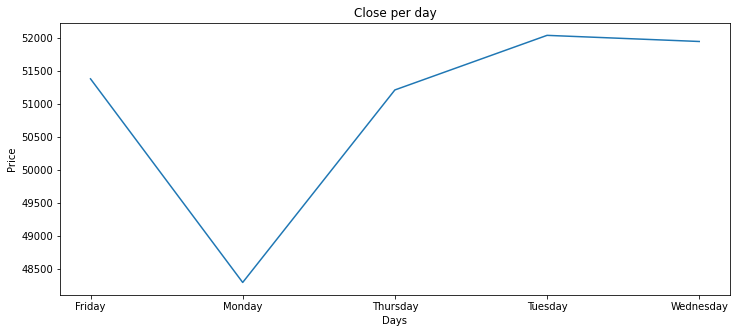

In [27]:
plt.figure(figsize=(12,5))
plt.plot(close_day);plt.xlabel("Days");plt.ylabel('Price');plt.title("Close per day")
plt.show()

+ Here We have conclude that stock prise is High and almost same except Monday.

### Monthly Close Stock Price data distribution

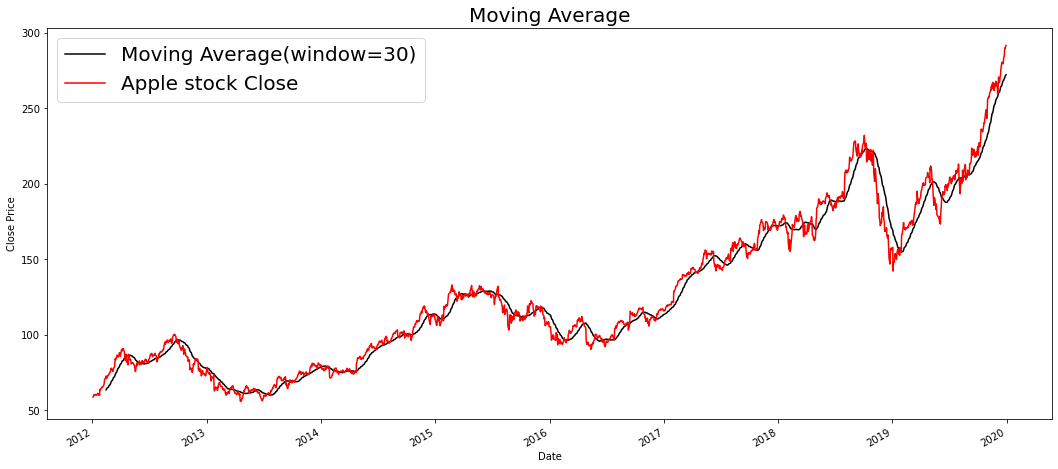

In [28]:
plt.figure(figsize=(18,8))
df['Close'].rolling(window=30).mean().plot(label='Moving Average(window=30)',color='black')
df['Close'].plot(label='Apple stock Close',color='red')
plt.title("Moving Average", fontsize=20);plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=20)
plt.show()

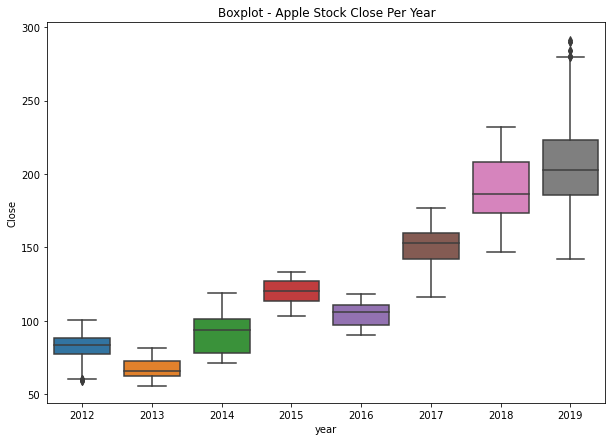

In [29]:
plt.figure(figsize = (10,7))
sns.boxplot(x=df['year'], y = df['Close'])
plt.title('Boxplot - Apple Stock Close Per Year')
plt.style.context('fivethirtyeight')
plt.show()

+ Outliers Present in Year 2012 and 2019
+ Lot of Variability in Years 2014, 2017-19
+ 2019 most volatile year among all years
+ Upward Rising Trend is shown

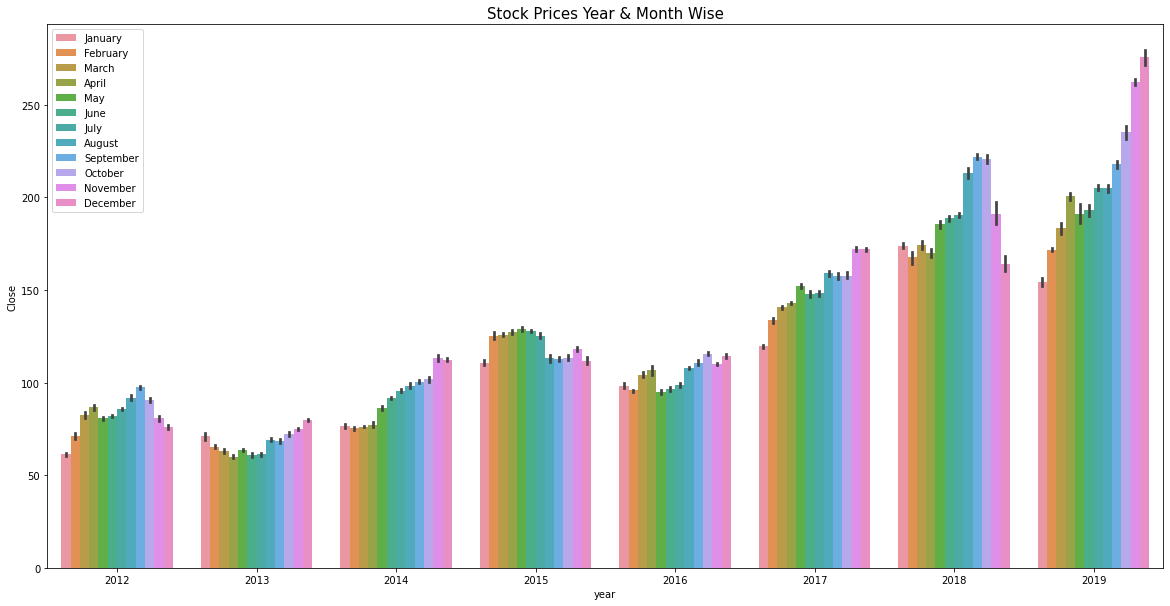

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("Paired", 4)
a = sns.barplot(x=df['year'], y=df["Close"],hue = df['month'],data=df['month'])
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

+ Above figure shows that the Period from July-September seems to push stock price above in comparision to other months. The primary reason for this is as Apple has a product cycle release date during this time.

In [31]:
# Resampling Data to Month by Aggregating using mean
monthly_mean = df['Close'].resample('M').mean()
monthly_df = monthly_mean.to_frame()
monthly_df

,Close
Date,
2012-01-31,61.225500
2012-02-29,71.082000
2012-03-31,82.500909
2012-04-30,86.572500
2012-05-31,80.667273
...,...
2019-08-31,204.957727
2019-09-30,217.995000
2019-10-31,235.286522


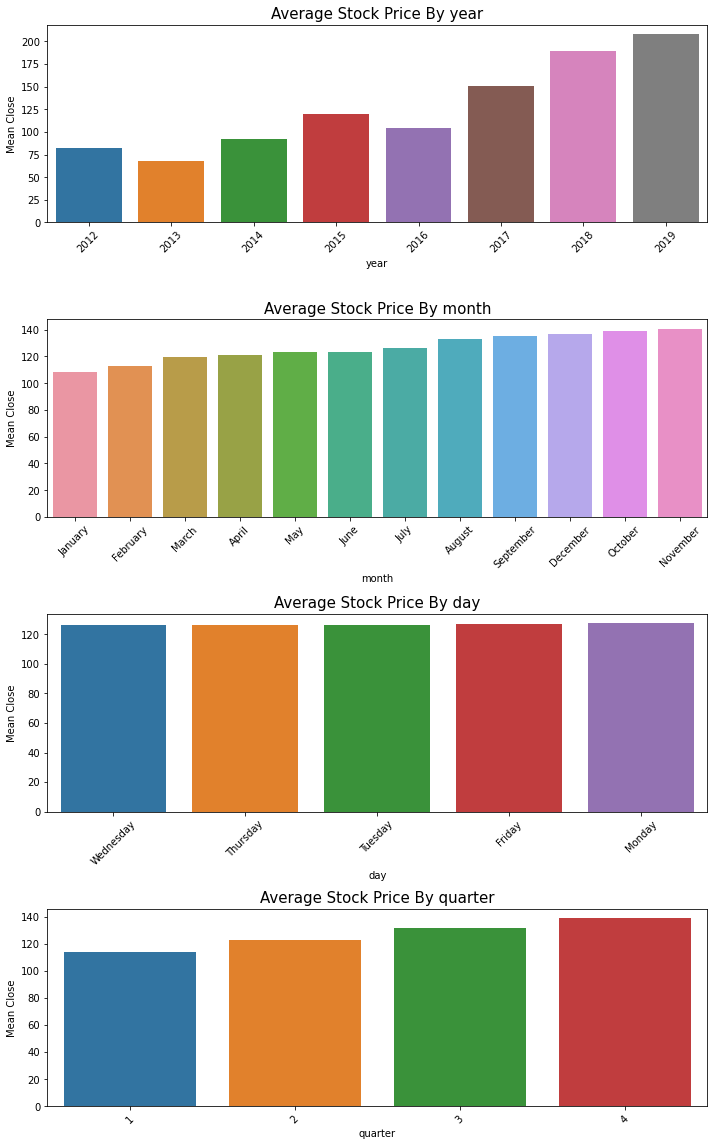

In [32]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = df.drop(['Open','High','Low','Adj Close','Volume'], axis = 1)
group_cols = group_cols.columns

for enum,i in enumerate(group_cols[1:]):
    ax = fig.add_subplot(4,1,enum+1)
    Aggregated = pd.DataFrame(df.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
    sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
    ax.set(xlabel=str(i), ylabel='Mean Close')
    ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
    plt.xticks(rotation=45)
plt.tight_layout(pad=1)

+ According to Mean price by Years, 2013 and 2016 are the only years where Mean price is lower than previous Year.
+ Average Stock Price is lower at start of the week in comparision to the end of the week.
+ The Average Price is Highest in the Month of November.
+ Q4 is the best for Apple according to average stock price. By sales figures Q4 has always been strong for Apple since the new product cycle takes place and its the Holiday period. We also observe this as a seasonal effect for Apple.

### Model Building
### Decomposition of Time Series

In [33]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose as sd

<Figure size 1440x1152 with 0 Axes>

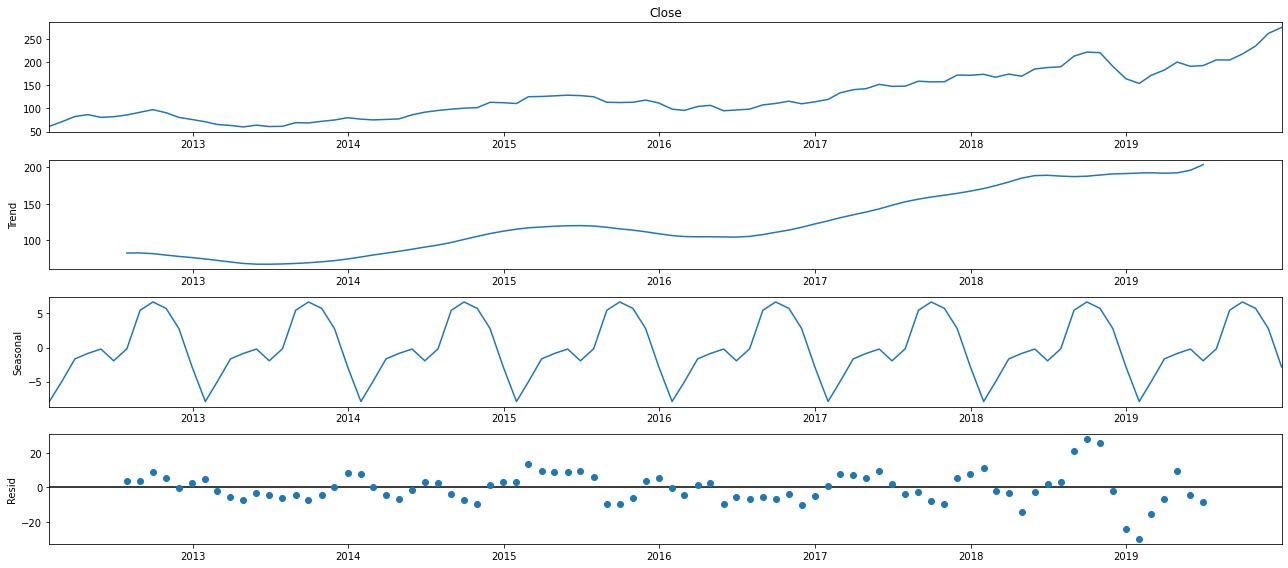

In [34]:
rcParams['figure.figsize']=18,8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_df['Close'],model='additive')
decomposed_series.plot()
plt.show()

+ Trend : Overall an Upward Trend
+ Seasonality :There appears to be seasonality,AAPLE has rallied during the last 3 Months of every year. Oct to Dec period has good sales for Apple Over the Years.
*     You can see the uniform seasonal change.
*     Non-uniform noise that represent outliers and missing values
#### We can quite clearly see that the data has all 3, Levels, Trends, Seasonality.

### Plotting Rolling Statistics
+ We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.

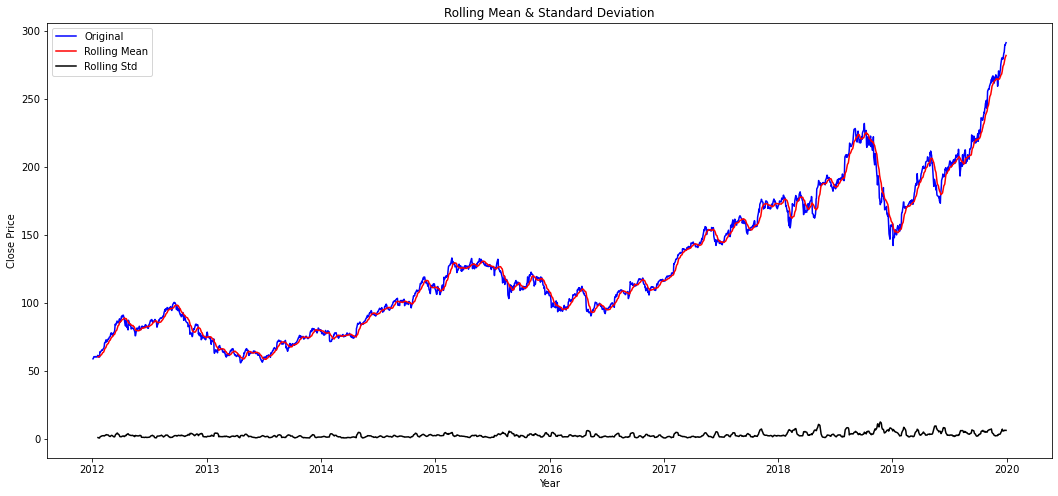

In [35]:
rolmean = df['Close'].rolling(12).mean()
rolstd = df['Close'].rolling(12).std()

#Plot rolling statistics:

orig = plt.plot(df['Close'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.xlabel("Year")
plt.ylabel('Close Price')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

+ We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
+ The time series is hence not stationary

### Test of Stationarity:
+ Time Series is Stationary if we have constant mean, constant variance and No Trend and No Seasonality

+ But in our data set we can see uprising trend and also seasonality is present, So we can say that our data is Non-Stationary.

**ADF(Augmented Dickey-Fuller) Test**


In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
def adfuller_test(close):
    result = adfuller(close)
    labels = ['ADF Test Statistic', 'p-value','#Lags Used', 'Number of Observations used']
    for value, label in zip(result, labels):
        print(label+' : ' +str(value))
    if result[1] <= 0.05:
        print("Reject Null Hypothesis. Data is Stationary")
    else:
        print("Accept Null Hypothesis. Data is Non - Stationary")

In [38]:
adfuller_test(df['Close'])

ADF Test Statistic : 1.2193479467002395
p-value : 0.9961168706935021
#Lags Used : 9
Number of Observations used : 2001
Accept Null Hypothesis. Data is Non - Stationary


### Detrend

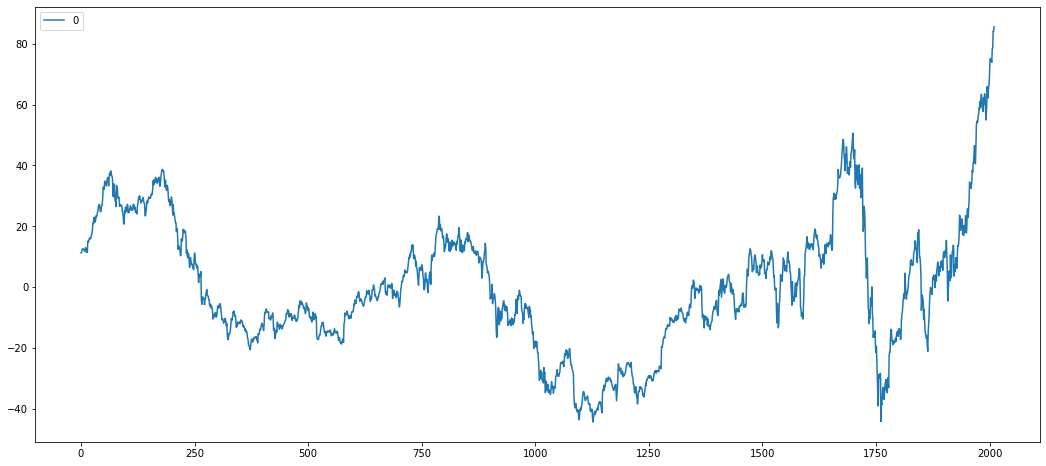

In [39]:
from scipy import signal
detrended = signal.detrend(df.Close)
detrended_df = pd.DataFrame(detrended)
detrended_df.plot()
plt.show()

In [40]:
adfuller_test(detrended_df)

ADF Test Statistic : -0.7538890107192677
p-value : 0.8322931564204986
#Lags Used : 9
Number of Observations used : 2001
Accept Null Hypothesis. Data is Non - Stationary


### Differencing
+ Differencing is a popular and widely used data transform for making time series data stationary.
+ Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.
+ Differencing shifts ONE/MORE row towards downwards.

[Source Video](https://www.youtube.com/watch?v=nPYPyh20gGo)

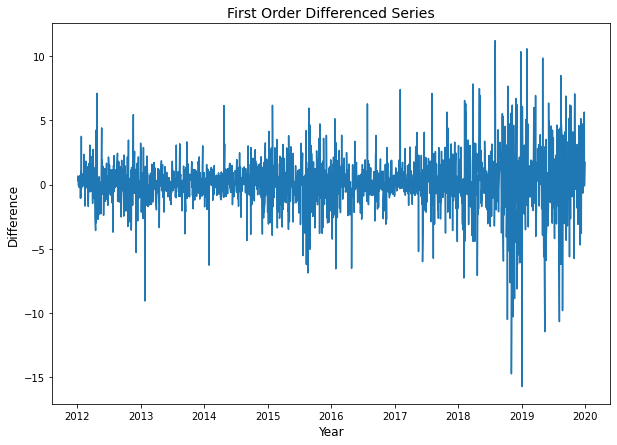

In [41]:
#Change for (t)th day is Close for (t)th day minus Close for (t-1)th day.
df['Diff'] = df['Close'].diff()

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(df['Diff'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [42]:
adfuller_test(df['Diff'].dropna())

ADF Test Statistic : -13.625538376073825
p-value : 1.7630934279439238e-25
#Lags Used : 8
Number of Observations used : 2001
Reject Null Hypothesis. Data is Stationary


+ **Our Series is now stationary**

### ACF plots and PACF plots
+ Let's review the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots
+ If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.
+ This data is non-stationary as a high number of previous observations are correlated with future values.
+ Confidence intervals are drawn as a cone.
+ By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
+ The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

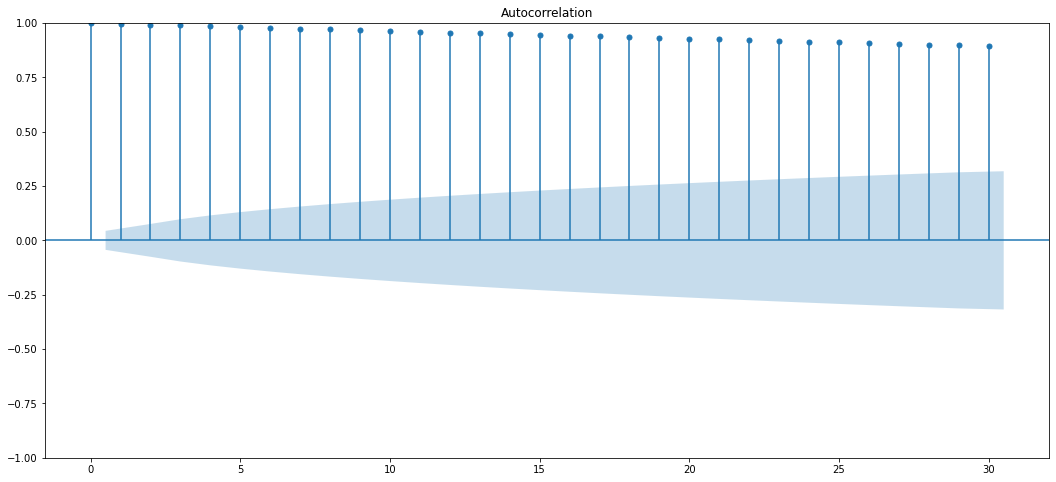

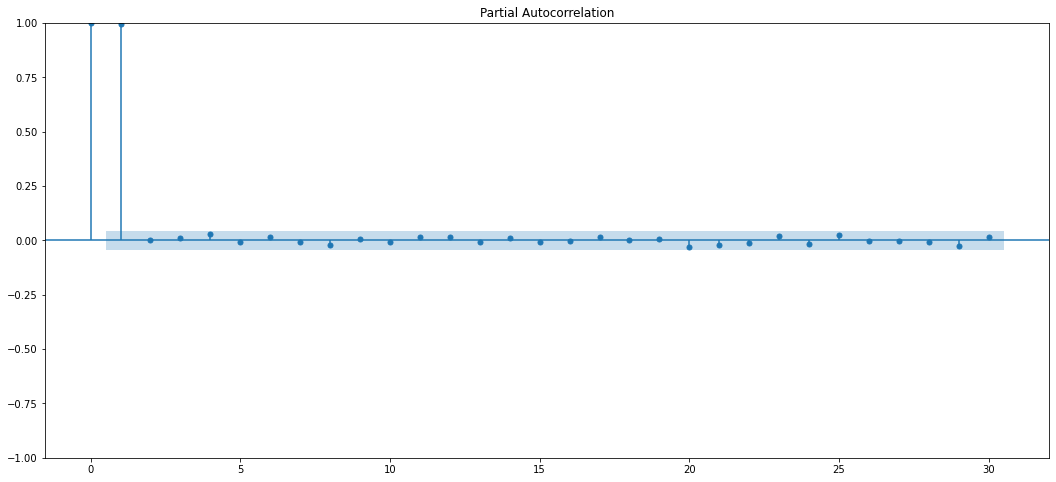

In [43]:
# Original Data
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf((df['Close'].dropna()),lags=30)
tsa_plots.plot_pacf((df['Close'].dropna()),lags=30)
plt.show()

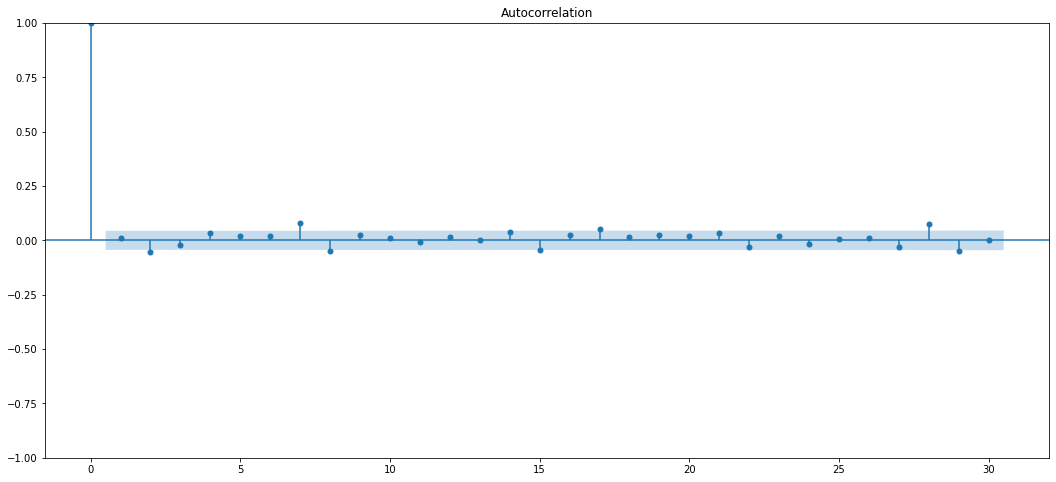

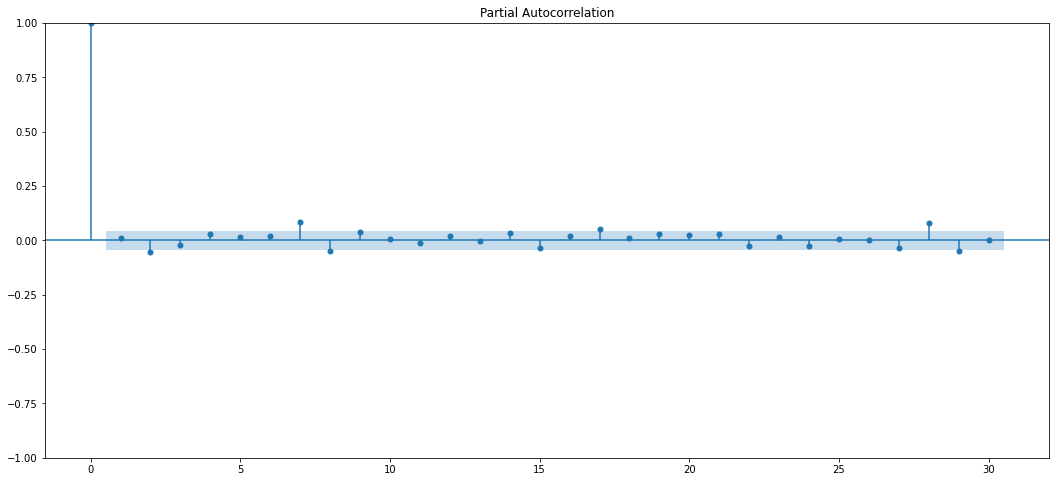

In [44]:
# After Differencing
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf((df['Diff'].dropna()),lags=30)
tsa_plots.plot_pacf((df['Diff'].dropna()),lags=30)
plt.show()

#### We can also use the pmdarima package to get the number of differencing. (Alternate method)

In [45]:
from pmdarima.arima.utils import ndiffs
ndiffs(df.Close, test = "adf")

1

**Interpreting ACF Plot:**
+ Slow decay of correlation values indicates that future values are heavily dependent on lagged values. This shows that series in not random and good for time series modelling.
+ It indicates MA(1) process

**Interpreting PACF Plot:**    
+ Sudden Decay at Lag-1, Order of series seems AR(1)  
+ Here we can see that the first lag is significantly out of the limit and the second one is also out of the significant limit but it is not that far so we can select the order of the p as 1.
**Order Of Differencing is 1
#### p=1, d=1, q=1

### ARIMA Model
+ ARIMA – Auto Regression Integrated Moving Average Model.
+ It goes through differencing steps to eliminate the non-stationary part.
+ ARIMA Models are specified by three order parameters: (p, d, q)
+ p is the order of the AR term,
+ q is the order of the MA term,
+ d is the number of differencing required to make the time series stationary
+ An ARIMA model is one where the time series was differenced at least once to make it stationary and we combine the AR and the MA terms.

In [46]:
df.drop(["Open",'High','Low','Adj Close','Volume','year','month','day','quarter'], axis = 1, inplace = True)
# df.head()

In [47]:
df1=df.drop("Close", axis=1)
df1.head()

,Diff
Date,
2012-01-03,NaN
2012-01-04,0.31
2012-01-05,0.66
2012-01-06,0.62
2012-01-09,-0.09


In [48]:
df=df.drop("Diff", axis=1)
df.head()

,Close
Date,
2012-01-03,58.75
2012-01-04,59.06
2012-01-05,59.72
2012-01-06,60.34
2012-01-09,60.25


In [49]:
split_date = "2018-01-01"
train = df.loc[df.index < split_date]
test = df.loc[df.index >= split_date]
print("Train data :", train.shape)
print("Test data :",test.shape)

Train data : (1509, 1)
Test data : (502, 1)


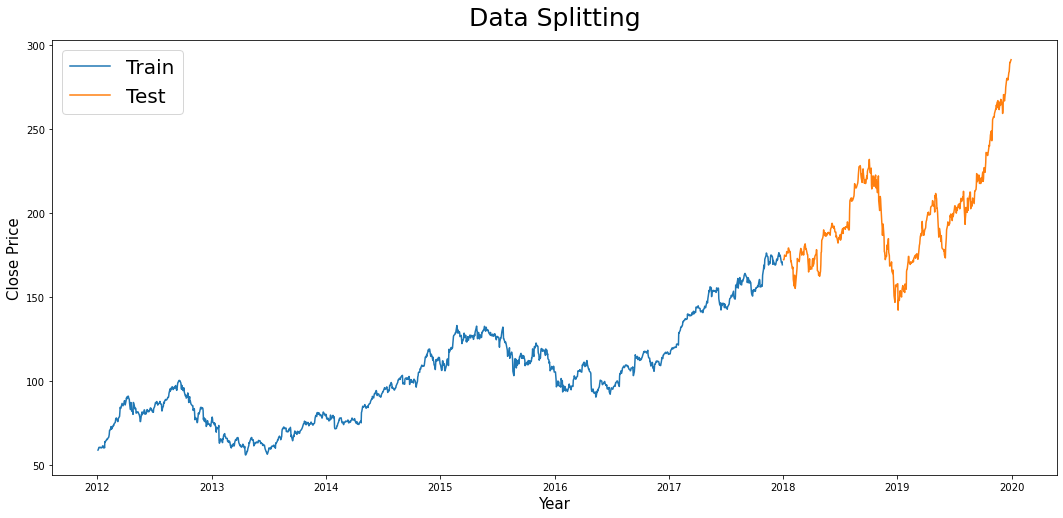

In [50]:
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.title("Data Splitting", size = 25, y = 1.02)
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(fontsize = 20)
plt.show()

In [51]:
# Figure out order for ARIMA Model
from pmdarima import auto_arima

In [52]:
stepwise_fit = auto_arima(train, trace = True, suppress_warnings=True, seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5589.604, Time=1.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5591.585, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5592.740, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5592.676, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5592.981, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5594.532, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5594.385, Time=0.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5594.068, Time=1.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5594.046, Time=1.67 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5594.158, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5595.597, Time=0.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5595.633, Time=0.59 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5595.542, Time=1.90 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5590.956, Time=0.54 sec

Best model:  ARIMA(2,1,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1509
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2788.802
Date:                Wed, 21 Dec 2022   AIC                           5589.604
Time:                        12:44:03   BIC                           5621.515
Sample:                             0   HQIC                          5601.488
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1060      0.057      1.870      0.061      -0.005       0.217
ar.L1          0.5563      0.014     39.737      0.000       0.529       0.584
ar.L2         -0.9850      0.014    -69.450      0.000      -1.013      -0.957
ma.L1         -0.5644      0.018    -31.595      0.000      -0.599      -0.529
ma.L2          0.9758      0.018     54.045      0.000       0.940       1.011
sigma2         2.3620      0.052     45.138      0.000       2.259       2.465
===================================================================================
Ljung-Box (L1) (Q):                   1.38   Jarque-Bera (JB):               843.54
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train['Close'],order = (1,1,1))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1509
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2794.704
Date:                Wed, 21 Dec 2022   AIC                           5595.408
Time:                        12:44:03   BIC                           5611.363
Sample:                             0   HQIC                          5601.350
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3193      0.655     -0.487      0.626      -1.604       0.965
ma.L1          0.3500      0.650      0.539      0.590      -0.924       1.624
sigma2         2.3836      0.052     46.165      0.000       2.282       2.485
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               866.63
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
test_pred = pd.DataFrame(result.predict(len(train),len(train)+501,type='levels'))
test_pred.index = test.index
test_pred

,predicted_mean
Date,
2018-01-02,169.174040
2018-01-03,169.191910
2018-01-04,169.186203
2018-01-05,169.188026
2018-01-08,169.187444
...,...
2019-12-23,169.187585
2019-12-24,169.187585
2019-12-26,169.187585


In [55]:
start = len(train)
end=len(train)+len(test)-1
test_pred = pd.DataFrame(result.predict(start = start, end=end, type='levels'))
test_pred_index = test.index
test_pred
test_pred.index = df.index[start:end+1]   # To print ouput in date format
print(test_pred)

            predicted_mean
Date                      
2018-01-02      169.174040
2018-01-03      169.191910
2018-01-04      169.186203
2018-01-05      169.188026
2018-01-08      169.187444
...                    ...
2019-12-23      169.187585
2019-12-24      169.187585
2019-12-26      169.187585
2019-12-27      169.187585
2019-12-30      169.187585

[502 rows x 1 columns]


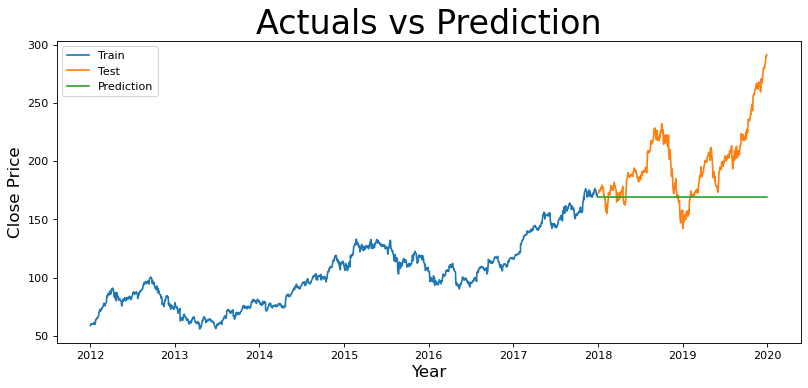

In [56]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.title('Actuals vs Prediction', size=30)
plt.legend(loc='upper left', fontsize=10)
plt.show()

+ **Here, we got straight line because we have seasonal patterns in our data. So, we have seen ARIMA Model is not predicting well. Hence we can't use ARIMA model for future prediction**


In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

In [58]:
mse = mean_squared_error(test_pred['predicted_mean'],test['Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred.predicted_mean,test.Close)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred.predicted_mean,test.Close)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  1740.3560168239135
Root Mean Squared Error (RMSE) =  41.72
Mean Absolute Error (MAE)  =  31.587587177247517
Mean Absolute Percentage Error (MAPE)  =  0.18670156921977032


+ **RMSE** : It measures the average magnitude of the errors and is concerned with the deviations from the actual value. RMSE value with zero indicates that the model has a perfect fit. The lower the RMSE, the better the model and its predictions.
+ **Mean absolute error**: It is calculated by taking the absolute difference between the predicted values and the actual values and averaging it across the dataset. Mathematically speaking, it is the arithmetic average of absolute errors. MAE measures only the magnitude of the errors and doesn’t concern itself with their direction. The lower the MAE, the higher the accuracy of a model.

### SARIMA
+ An extension to ARIMA that supports the direct modeling of the seasonal component of the series is called SARIMA - Seasonal Autoregressive Integrated Moving Average.
+ There are four seasonal elements that are not part of ARIMA that must be configured; they are:
+ P: Seasonal autoregressive order.
+ D: Seasonal difference order.
+ Q: Seasonal moving average order.
+ m: The number of time steps for a single seasonal period.

In [59]:
import itertools
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 22) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 22)
SARIMAX: (0, 1, 1) x (0, 1, 2, 22)
SARIMAX: (0, 1, 2) x (1, 1, 0, 22)
SARIMAX: (0, 1, 2) x (1, 1, 1, 22)


In [60]:
model_SA = sm.tsa.SARIMAX(train['Close'], order=(0,1,2), seasonal_order=(1,1,0,66))
result_SA = model_SA.fit()
result_SA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 1509
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 66)   Log Likelihood               -3016.116
Date:                             Wed, 21 Dec 2022   AIC                           6040.232
Time:                                     12:44:28   BIC                           6061.327
Sample:                                          0   HQIC                          6048.106
                                            - 1509                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0037      0.023      0.160      0.873      -0.042       0.049
ma.L2         -0.0329      0.025     -1.307      0.191      -0.082       0.016
ar.S.L66      -0.4966      0.018    -28.337      0.000      -0.531      -0.462
sigma2         3.7901      0.090     42.147      0.000       3.614       3.966
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               548.63
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
test_pred_SA = pd.DataFrame(result_SA.predict(len(train),len(train)+501,type='levels'))
test_pred_SA.index = test.index
test_pred_SA

,predicted_mean
Date,
2018-01-02,170.072161
2018-01-03,169.463860
2018-01-04,168.848893
2018-01-05,169.735641
2018-01-08,169.005296
...,...
2019-12-23,276.735603
2019-12-24,278.666346
2019-12-26,277.815520


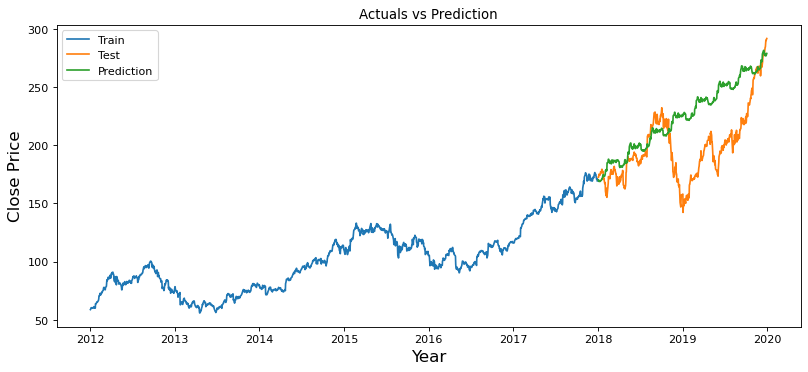

In [62]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label='Test')
plt.plot(test_pred_SA, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

+ Here, Using SARIMA Model we have seen that prediction is showing an upward trend. So, It's a good model and predicting well. Hence We can use this model for future Prediction.

In [63]:
mse = mean_squared_error(test_pred_SA['predicted_mean'],test['Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  1326.4440427389102
Root Mean Squared Error (RMSE) =  36.42
Mean Absolute Error (MAE)  =  28.50833475028065
Mean Absolute Percentage Error (MAPE)  =  0.12270984482267983


### Forecast for next 30 days

In [64]:
forecast_SA = result_SA.predict(len(df), len(df)+31, type = 'levels')
forecast_SA
index_future_dates = pd.date_range(start='2019-12-30', end = '2020-01-30')
forecast_SA.index=index_future_dates
print(forecast_SA)

2019-12-30    279.799050
2019-12-31    280.655338
2020-01-01    280.132366
2020-01-02    279.214846
2020-01-03    277.006676
2020-01-04    279.125434
2020-01-05    279.065936
2020-01-06    278.374619
2020-01-07    278.482390
2020-01-08    278.077185
2020-01-09    277.633460
2020-01-10    277.610732
2020-01-11    279.604935
2020-01-12    278.086171
2020-01-13    279.416508
2020-01-14    279.171465
2020-01-15    279.942944
2020-01-16    281.130123
2020-01-17    280.400546
2020-01-18    279.873353
2020-01-19    280.335005
2020-01-20    279.455658
2020-01-21    275.597481
2020-01-22    275.121692
2020-01-23    275.000034
2020-01-24    274.617815
2020-01-25    275.541907
2020-01-26    274.820647
2020-01-27    274.686664
2020-01-28    275.177790
2020-01-29    274.910373
2020-01-30    274.355812
Freq: D, Name: predicted_mean, dtype: float64


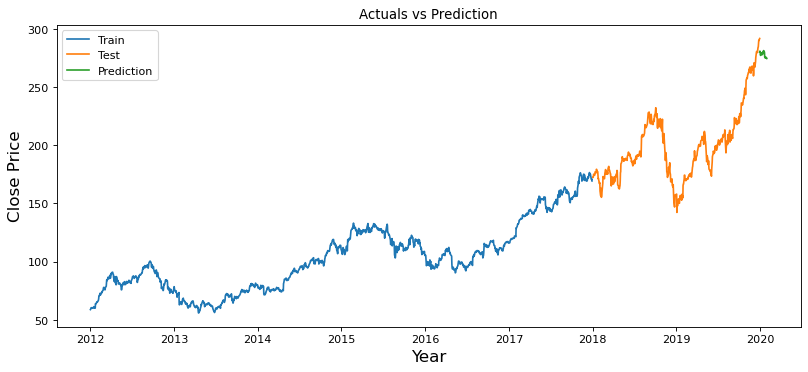

In [65]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label='Test')
plt.plot(forecast_SA, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

+ Here We plotted prediction plot.

### Holt Method
+ A Thorough Introduction to Holt-Winters Forecasting
+ The Holt-Winters method — also known as triple exponential smoothing — is an incredibly popular and relatively simple method for time series forecasting. This article will be a somewhat thorough introduction into the math and theory of the Holt-Winters method, complete with a Python implementation from scratch.
+ HOLT-WINTERS METHOD: The Holt-Winters method is a very common time series forecasting procedure capable of including both trend and seasonality. The Holt-Winters method itself is a combination of 3 other much simpler components, all of which are smoothing methods:
+ Simple Exponential Smoothing (SES): Simple exponential smoothing assumes that the time series has no change in level. Thus, it can not be used with series that contain trend, seasonality, or both.
+ Holt’s Exponential Smoothing (HES): Holt’s exponential smoothing is one step above simple exponential smoothing, as it allows the time series data to have a trend component. Holt’s exponential smoothing is still incapable of cope with seasonal data.
+ Winter’s Exponential Smoothing (WES): Winter’s exponential smoothing is an extension to Holt’s exponential smoothing that finally allows for the inclusion of seasonality. Winter’s exponential smoothing is what is referred to as the Holt-Winters method.
+ The Holt-Winters method therefore is often referred to as triple exponential smoothing, as it is literally the combination of 3 smoothing methods built on top of each-other.

In [66]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [67]:
'''Before starting with the models, we shall first define the weight coefficient Alpha and the Time Period. We also set the DateTime frequency to a monthly level.
#### Set the value of Alpha and define m (Time Period)'''
m = 22
alpha = 1/(2*m)

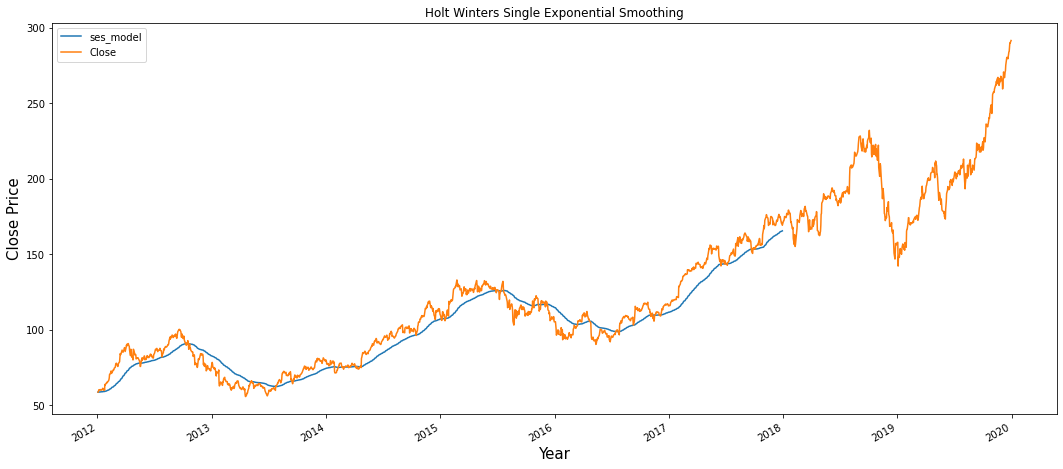

In [68]:
# Single/Simple Exponential Method
df['ses_model'] = SimpleExpSmoothing(train["Close"]).fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues
df[['ses_model','Close']].plot(title='Holt Winters Single Exponential Smoothing', legend=True)
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.show()
# df2['ses_model']

+ As expected, it didn’t fit quite well, and rightfully so, because if we remember, Single ES doesn’t work for data with Trends and Seasonality.

#### Double HWES

+ So, we’d fit the data on Double ES, on both Additive and Multiplicative Trend,

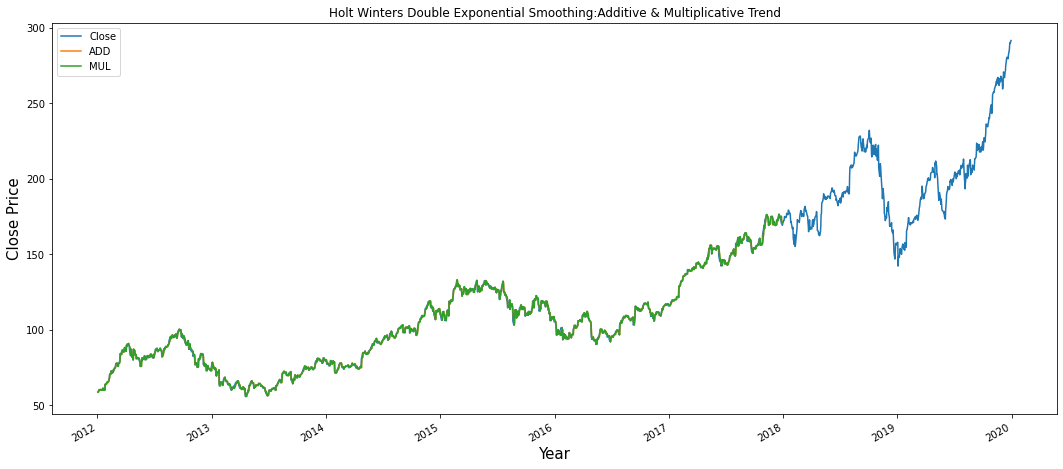

In [69]:
df['ADD'] = ExponentialSmoothing(train['Close'],trend='add').fit().fittedvalues
df['MUL'] = ExponentialSmoothing(train['Close'],trend='mul').fit().fittedvalues
df[['Close','ADD','MUL']].plot(title='Holt Winters Double Exponential Smoothing:Additive & Multiplicative Trend')
plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.show()

+ This looks promising! Here we have plotted for both Additive and Multiplicative Seasonality.

#### Forecasting with Holt-Winters Exponential Smoothing (Triple ES) : 
+ Let’s try and forecast sequences, let us start by dividing the dataset into Train and Test Set. We have taken 1509 data points as Train set and the last 502 data points as Test Set.

In [70]:
# Fit the model tend='mul', season='mul'
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=66).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    168.761826
2018-01-03    169.466025
2018-01-04    170.148999
2018-01-05    170.335762
2018-01-08    170.626117
                 ...    
2019-12-23    235.279500
2019-12-24    236.226064
2019-12-26    235.817281
2019-12-27    235.549182
2019-12-30    235.578136
Length: 502, dtype: float64


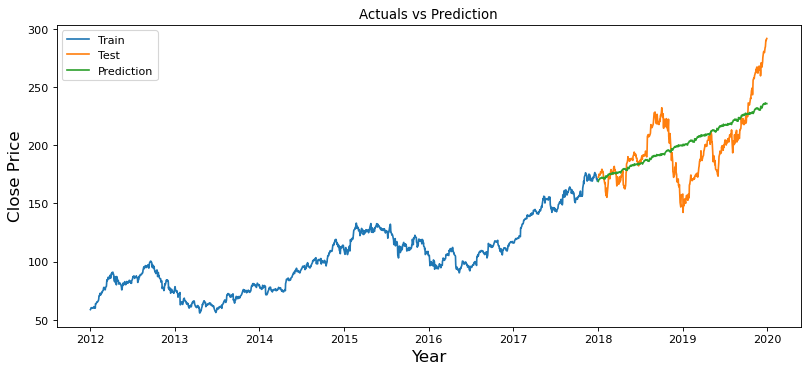

In [71]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

+ Here, we have seen that prediction using Holt Winter Method showing upward trend.

In [72]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  528.3950618174459
Root Mean Squared Error (RMSE) =  22.99
Mean Absolute Error (MAE)  =  18.418693518878065
Mean Absolute Percentage Error (MAPE)  =  0.09413163553641057


In [73]:
# Fit the model tend='add', season='mul'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=66).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    168.726899
2018-01-03    169.394000
2018-01-04    170.039025
2018-01-05    170.189525
2018-01-08    170.440478
                 ...    
2019-12-23    207.777378
2019-12-24    208.551770
2019-12-26    208.131712
2019-12-27    207.838592
2019-12-30    207.805477
Length: 502, dtype: float64


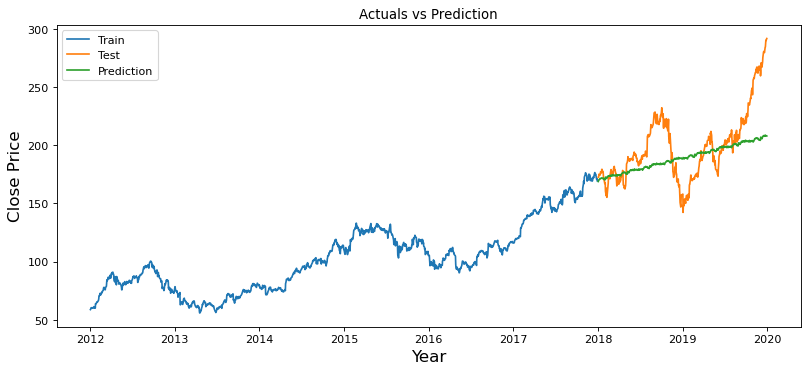

In [74]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [75]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  691.2682063565054
Root Mean Squared Error (RMSE) =  26.29
Mean Absolute Error (MAE)  =  19.360354666918116
Mean Absolute Percentage Error (MAPE)  =  0.09243315101102467


In [76]:
# Fit the model tend='mul', season='add'
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='add',seasonal_periods=66).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    168.879164
2018-01-03    169.333735
2018-01-04    169.752964
2018-01-05    169.909201
2018-01-08    170.070515
                 ...    
2019-12-23    232.872666
2019-12-24    233.228854
2019-12-26    233.057373
2019-12-27    233.126128
2019-12-30    233.153315
Length: 502, dtype: float64


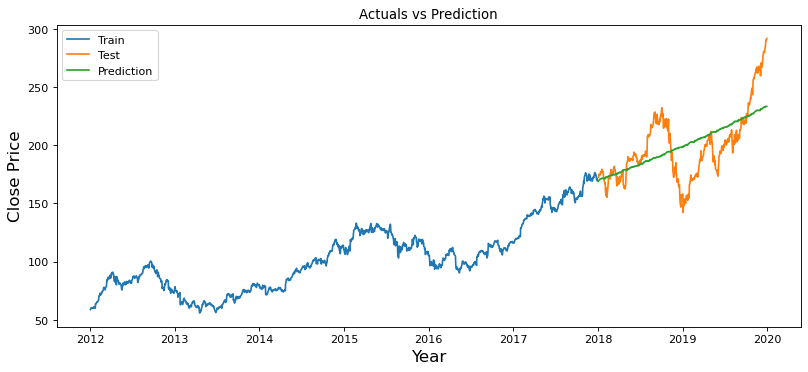

In [77]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [78]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  524.3695305308332
Root Mean Squared Error (RMSE) =  22.9
Mean Absolute Error (MAE)  =  18.234536756057732
Mean Absolute Percentage Error (MAPE)  =  0.09273648559405953


In [79]:
# Fit the model tend='add', season='add'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=66).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    168.844079
2018-01-03    169.263740
2018-01-04    169.649217
2018-01-05    169.772094
2018-01-08    169.900244
                 ...    
2019-12-23    206.600770
2019-12-24    206.881892
2019-12-26    206.634827
2019-12-27    206.628623
2019-12-30    206.580884
Length: 502, dtype: float64


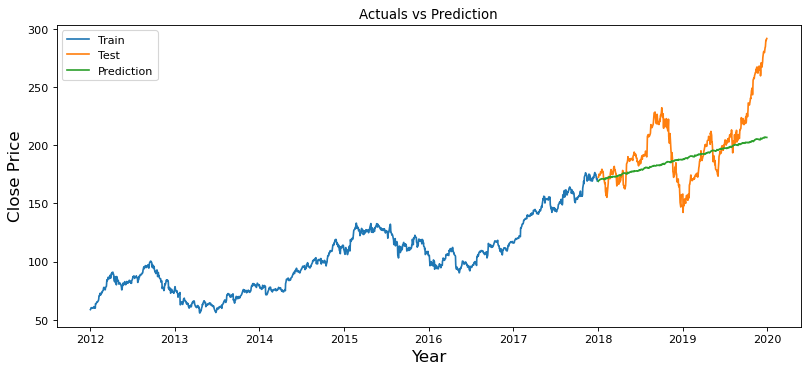

In [80]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction');plt.xlabel("Year", size=15);plt.ylabel('Close Price', size = 15)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [81]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  706.2226914694745
Root Mean Squared Error (RMSE) =  26.57
Mean Absolute Error (MAE)  =  19.608600648904208
Mean Absolute Percentage Error (MAPE)  =  0.09339595965786474


# Conclusion

1) We have selected the SARIMA model because our data is  Seasonal.       

2) SARIMA has more input parameters than Holt-Winters Method and has a better prediction.                                                      

3) SARIMA model is accurate on short-period forecasting but less accurate on long-period forecasting.

# The End ....!